# Author : Zakaria Lahmouz  (Data Scientist)


In [ ]:
%pip install pandas numpy matplotlib sklearn joblib seaborn xgboost

In [290]:
# On importe les librairies importantes pour le traitement des données,les modèles utilisés et les métriques d'évaluation 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import joblib  # Pour sauvegarder le modèle
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
from sklearn.svm import SVC
import xgboost as xgb


## Data Visualisation and Feature Engineering

In [291]:
dataframe = pd.read_csv("nba_logreg.csv")  # Récupération des données


,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
5,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,32.5,...,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0.0
8,Duane Cooper,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,23.3,...,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,T.J. Warren,40,15.4,6.1,2.8,5.4,52.8,0.1,0.5,23.8,...,0.5,73.7,1.0,1.1,2.1,0.6,0.5,0.2,0.7,0.0
1333,Byron Houston,79,16.1,5.3,1.8,4.1,44.6,0.0,0.1,28.6,...,2.5,66.5,1.5,2.5,4.0,0.9,0.6,0.5,1.1,0.0
1334,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0


In [198]:
dataframe.columns   # Les colonnes de la base de données

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

In [199]:
dataframe.info() # cette ligne permet de récuperer le nombre de valeurs non nulles pour chaque colonne et aussi le type des variables et distinguer entre les variables catégoriques et numériques

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1309 non-null   object 
 1   GP           1309 non-null   int64  
 2   MIN          1309 non-null   float64
 3   PTS          1309 non-null   float64
 4   FGM          1309 non-null   float64
 5   FGA          1309 non-null   float64
 6   FG%          1309 non-null   float64
 7   3P Made      1309 non-null   float64
 8   3PA          1309 non-null   float64
 9   3P%          1299 non-null   float64
 10  FTM          1309 non-null   float64
 11  FTA          1309 non-null   float64
 12  FT%          1309 non-null   float64
 13  OREB         1309 non-null   float64
 14  DREB         1309 non-null   float64
 15  REB          1309 non-null   float64
 16  AST          1309 non-null   float64
 17  STL          1309 non-null   float64
 18  BLK          1309 non-null   float64
 19  TOV   

We notice that all the features are numerical variables except for the player's name. Additionally, the "3P%" column is the only one containing missing values. Furthermore, when "3P%" is missing, "3PA" and "3PM" are both equal to 0. Therefore, we fill it with 0.

In [200]:
dataframe.isna().sum()       # Etude du nombre des valeurs manquantes pour chaque colonne

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            10
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [244]:
dataframe.fillna(0.0,inplace=True)  # On remplit les valeurs manquantes par 0.

In [292]:
duplicates = dataframe[dataframe.duplicated(subset=['Name'], keep=False)]
duplicates

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
18,Larry Johnson,82,37.2,19.2,7.5,15.3,49.0,0.1,0.3,22.7,...,5.0,82.9,3.9,7.0,11.0,3.6,1.0,0.6,1.9,0.0
19,Larry Johnson,82,37.2,19.2,7.5,15.3,49.0,0.1,0.3,22.7,...,5.0,82.9,3.9,7.0,11.0,3.6,1.0,0.6,1.9,1.0
71,Dee Brown,82,23.7,8.7,3.5,7.5,46.4,0.1,0.4,20.6,...,1.9,87.3,0.5,1.7,2.2,4.2,1.0,0.2,1.7,0.0
72,Dee Brown,82,23.7,8.7,3.5,7.5,46.4,0.1,0.4,20.6,...,1.9,87.3,0.5,1.7,2.2,4.2,1.0,0.2,1.7,1.0
73,Dee Brown,49,9.2,1.9,0.7,2.0,32.7,0.1,0.6,21.4,...,0.8,64.9,0.2,0.7,0.8,1.7,0.5,0.1,0.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,Cedric Henderson,82,30.8,10.1,4.2,8.8,48.0,0.0,0.0,0.0,...,2.3,71.6,0.9,3.1,4.0,2.0,1.2,0.6,2.0,0.0
1229,Glenn Robinson,80,37.0,21.9,8.0,17.6,45.1,1.1,3.4,32.1,...,6.2,79.6,2.1,4.3,6.4,2.5,1.4,0.3,3.9,0.0
1230,Glenn Robinson,80,37.0,21.9,8.0,17.6,45.1,1.1,3.4,32.1,...,6.2,79.6,2.1,4.3,6.4,2.5,1.4,0.3,3.9,1.0
1334,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0


I noticed the presence of duplicates in the dataset. For example, the player Dee Brown appears four times. Moreover, this same player has different labels: in row 71, he is labeled as 0 (career duration < 5 years), while in row 72, the label for the same player is 1.

In [243]:
dataframe.drop(index=duplicates.index, inplace=True) # On supprime les doublons
dataframe.reset_index(drop=True, inplace=True)  # on renitialise les indices de la dataframe

In [245]:
dataframe["TARGET_5Yrs"].value_counts(normalize=True)*100  #distribution des labels


TARGET_5Yrs
1.0    62.450593
0.0    37.549407
Name: proportion, dtype: float64

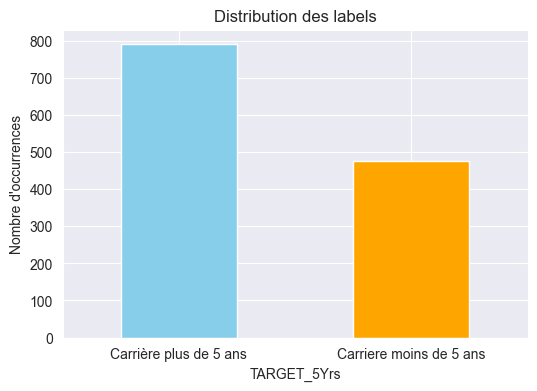

In [246]:
plt.figure(figsize=(6, 4))
dataframe['TARGET_5Yrs'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])

plt.title('Distribution des labels')
plt.ylabel('Nombre d\'occurrences')

# Afficher le graphique
plt.xticks([1,0], ['Carriere moins de 5 ans','Carrière plus de 5 ans'
                    ], rotation=0)  # Labels pour l'axe X
plt.show()

The two previous results show that the two classes are not perfectly balanced. In fact, the percentage of players with a career longer than 5 years is around 62%, while the percentage of players with a career shorter than 5 years is 38%.

In [293]:
dataframe.drop(columns=['Name'],inplace=True)
dataframe.describe()



The player's name does not determine the length of their career. Therefore, we will remove this column from the dataset.

We also observe that the features have different means and variances. Consequently, we consider applying MinMax scaling to normalize the data and bring them to a common scale

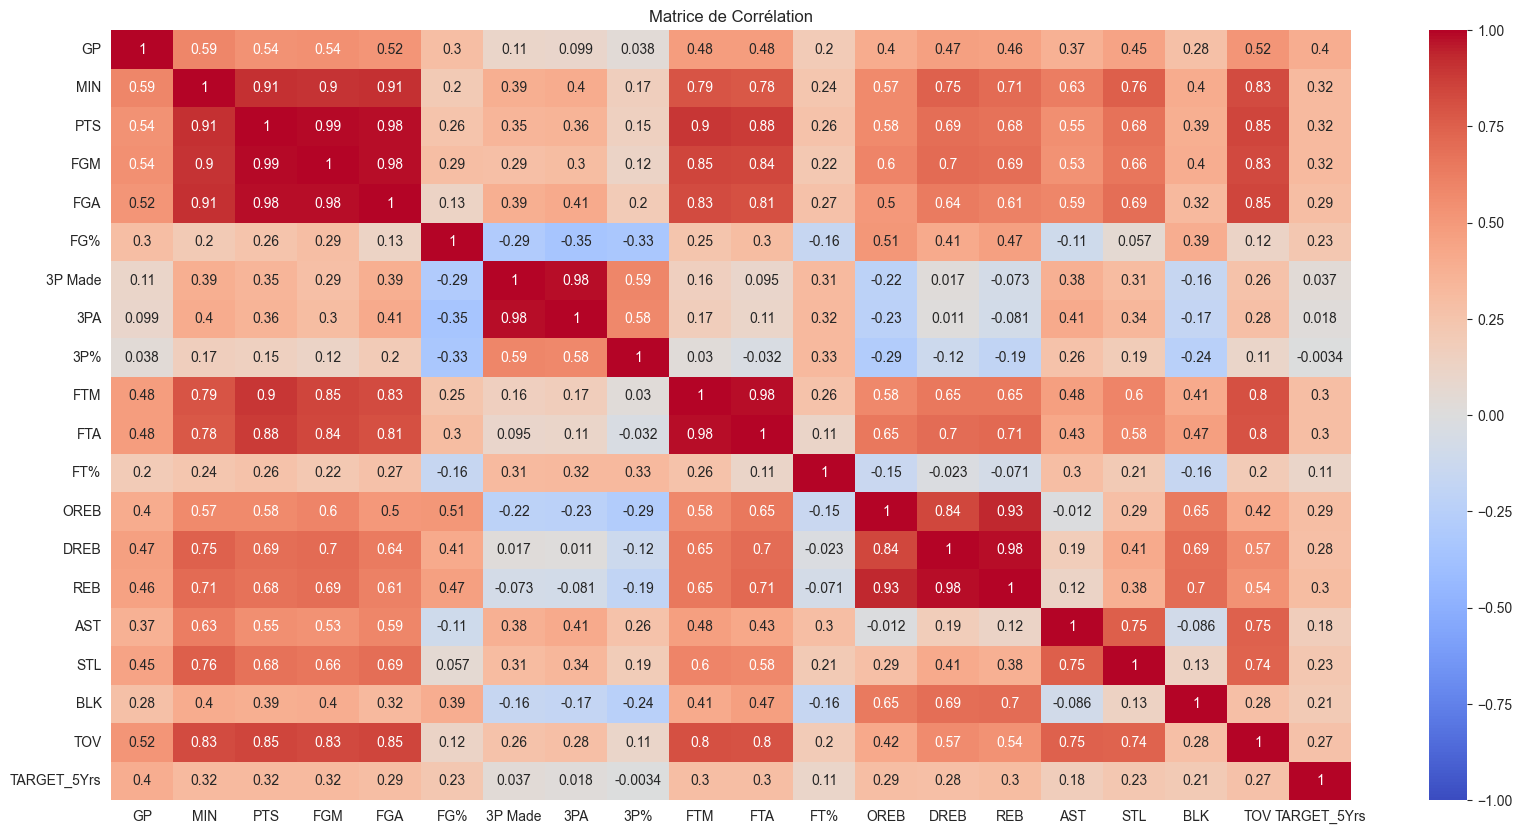

In [294]:
## Affichage de la matrice de correlation de la base de donnée

def plot_corr(dataframe):
    """
    :param dataframe: la dataframe
    :return: affichage de la matrice de corrélation
    """
    corr_matrix = dataframe.corr()
    #  Afficher la matrice de corrélation avec une heatmap
    plt.figure(figsize=(20, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Matrice de Corrélation')
    plt.show()
          
plot_corr(dataframe)


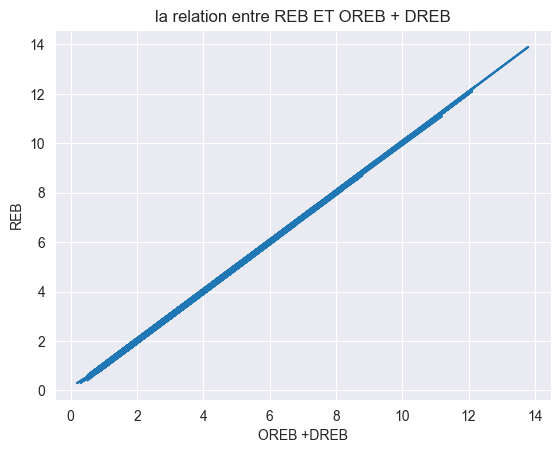

In [248]:
#la relation entre REB ET OREB + DREB
plt.figure()
plt.plot(dataframe['OREB']+dataframe['DREB'],dataframe['REB'])
plt.title("la relation entre REB ET OREB + DREB")
plt.ylabel("REB")
plt.xlabel("OREB +DREB")
plt.show()


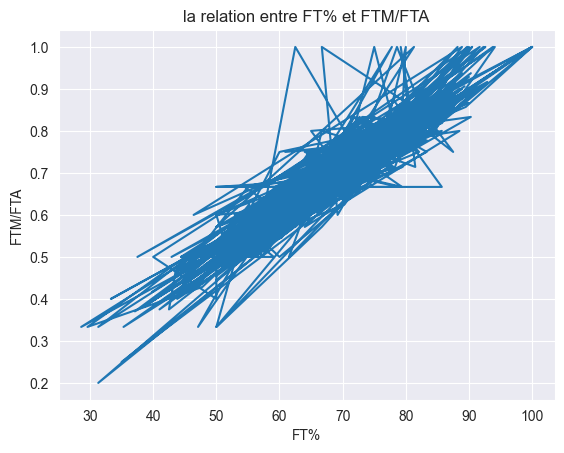

In [300]:
#la relation entre FT% et FTM/FTA"
plt.figure()
plt.plot(dataframe['FT%'], dataframe['FTM']/dataframe['FTA'])
plt.title("la relation entre FT% et FTM/FTA")
plt.ylabel("FTM/FTA")
plt.xlabel("FT%")
plt.show()

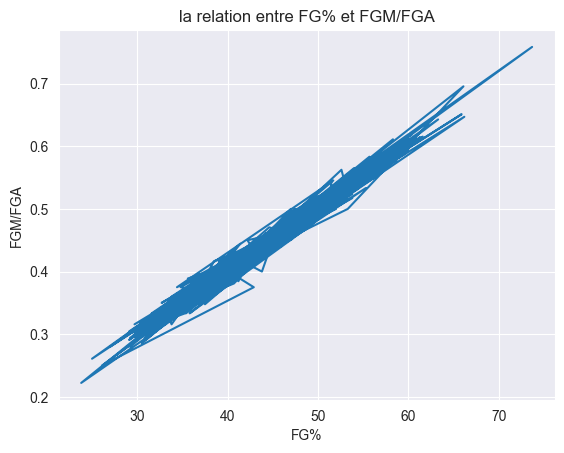

In [301]:
# la relation entre FG% et FGM/FGA"
plt.figure()
plt.plot(dataframe['FG%'], dataframe['FGM']/dataframe['FGA'])
plt.title("la relation entre FG% et FGM/FGA")
plt.ylabel("FGM/FGA")
plt.xlabel("FG%")
plt.show()

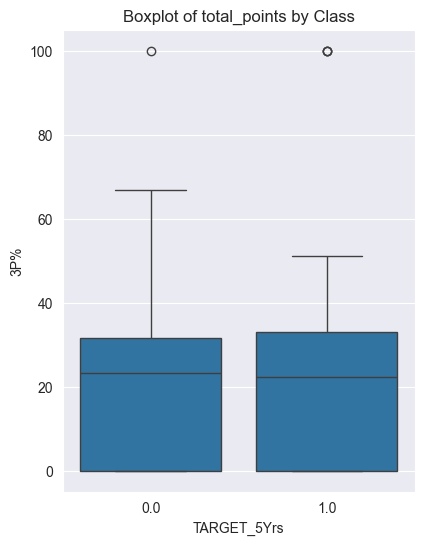

In [302]:
# On crée le boxplot de la feature 3P% 
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='TARGET_5Yrs', y='3P%', data=dataframe)

plt.title('Boxplot of total_points by Class')
plt.show()


In [297]:
# Création de nouvelles features
dataframe["total_points"] = dataframe["GP"]*dataframe["PTS"]  # le nombre total de points marqué
dataframe['effeciency'] =  dataframe["PTS"] / dataframe["MIN"] # l'efficacité du joueur a marquer des points
dataframe['DI'] = dataframe['DREB']+dataframe['STL']+dataframe['BLK'] # la contribution defensive du joueur 
dataframe['AST/TOV'] = dataframe["AST"] / dataframe["TOV"]    #  la capacité de distrubition correcte du ballon
dataframe['OREB/REB']=dataframe['OREB']/dataframe['REB']    # le pourcentage des rebounds offensifs
dataframe['game_impact'] = (dataframe['AST'] + dataframe['REB']) / dataframe['MIN']  # l'impact du joueur sur le match hors buts marqués

dataframe.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,...,STL,BLK,TOV,TARGET_5Yrs,total_points,effeciency,DI,AST/TOV,OREB/REB,game_impact
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,...,0.4,0.4,1.3,0.0,266.4,0.270073,4.2,1.461538,0.170732,0.218978
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,...,1.1,0.5,1.6,0.0,252.0,0.267658,3.6,2.312500,0.208333,0.226766
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,...,0.5,0.3,1.0,0.0,384.8,0.339869,2.5,1.000000,0.227273,0.209150
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,...,0.6,0.1,1.0,1.0,330.6,0.491379,1.6,0.800000,0.526316,0.232759
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,...,0.3,0.4,0.8,1.0,216.0,0.391304,2.2,0.375000,0.400000,0.243478


1. **Corrélation entre FGA et FGM**

   Les features **FGA** (Field Goals Attempted) et **FGM** (Field Goals Made) sont fortement corrélées entre elles avec un coefficient de corrélation égal à **0.98**. Ceci est normal, puisque plus le nombre de tentatives (**FGA**) augmente, plus le nombre de buts marqués (**FGM**) augmente aussi. La feature **FG%** (Field Goal Percentage) est plus significative en termes de performance du joueur que la feature FGA seule ou FGM.

2. **Raisonnement similaire pour 3P et FT**

   En suivant le même raisonnement, on observe une forte corrélation entre les features :
   - **3PA** (Three-Point Attempts) et **3PM** (Three-Point Made).  
   - **FTA** (Free Throw Attempts) et **FTM** (Free Throws Made).

   
3. **La matrice de corrélation et le boxplot montrent que la feature 3P% a un impact très faible sur la performance du joueur avec un coefficient de corrélation égal à 0.003.**
   
4. **Somme de OREB et DREB dans REB**

   La feature **REB** (Total Rebounds) est la somme des features **OREB** (Offensive Rebounds) et **DREB** (Defensive Rebounds).

5. **Importance des statistiques avancées**

   Les statistiques telles que le nombre de passes décisives (**AST**), interceptions (**STL**), contres (**BLK**), et balles perdues (**TOV**) fournissent également des informations précieuses sur la performance des joueurs pendant les matchs. Elles pourraient donc être utiles pour prédire la durée de leur carrière en NBA.Donc à partir de ces features, j'ai créé de nouvelles features qui reflètent mieux la performance des joueurs :

    **total_points** : Cette feature représente le nombre total de points marqués par un joueur NBA pendant tous les matchs de sa carrière. Elle est calculée en multipliant le nombre de matchs joués (**GP**) par la moyenne des points marqués pendant un match (**PTS**). Cette variable reflète bien la performance globale du joueur, mieux que la feature **GP** seule ou **PTS** seule.  

    **efficiency** : Cette feature mesure l'efficacité d'un joueur à marquer des points, en calculant le nombre de points marqués par minute jouée. Un joueur avec un ratio élevé de points marqués par minute (**efficiency**) pourrait potentiellement avoir une carrière plus longue. Cette feature capture ainsi l'efficacité offensive du joueur.
    
    **DI** : La contribution défensive du joueur. 
    
    **AST/TOV** rapport passe decisive/pertes de balle : cette feature mesure la capacité de distrubition correcte du ballon.
    
    **OREB/REB** le pourcentage des rebounds offensifs.1. **Correlation between FGA and FGM**

   The features **FGA** (Field Goals Attempted) and **FGM** (Field Goals Made) are highly correlated with a correlation coefficient of **0.98**. This is expected, as the more attempts (**FGA**) a player has, the more field goals made (**FGM**) they will likely achieve. The feature **FG%** (Field Goal Percentage) is more significant in terms of the player's performance than **FGA** or **FGM** alone.

2. **Similar reasoning for 3P and FT**

   Following the same reasoning, we observe a strong correlation between the features:
   - **3PA** (Three-Point Attempts) and **3PM** (Three-Point Made).  
   - **FTA** (Free Throw Attempts) and **FTM** (Free Throws Made).

3. **The correlation matrix and the boxplot show that the feature 3P% has a very weak impact on the player's performance, with a correlation coefficient of 0.003.**

4. **Sum of OREB and DREB in REB**

   The feature **REB** (Total Rebounds) is the sum of the features **OREB** (Offensive Rebounds) and **DREB** (Defensive Rebounds).

5. **Importance of advanced statistics**

   Statistics such as assists (**AST**), steals (**STL**), blocks (**BLK**), and turnovers (**TOV**) also provide valuable insights into a player's performance during games. Therefore, these could be useful for predicting the length of their NBA career. From these features, I created new features that better reflect player performance:

   - **total_points**: This feature represents the total number of points scored by an NBA player during all games of their career. It is calculated by multiplying the number of games played (**GP**) by the average points scored per game (**PTS**). This variable better reflects the player's overall performance than **GP** alone or **PTS** alone.

   - **efficiency**: This feature measures the player's efficiency in scoring points, by calculating the number of points scored per minute played. A player with a high points-per-minute ratio (**efficiency**) may potentially have a longer career. This feature thus captures the player's offensive efficiency.

   - **DI**: The player's defensive contribution.
   
   - **AST/TOV**: The assist-to-turnover ratio, which measures the player's ability to distribute the ball correctly.
   
   - **OREB/REB**: The percentage of offensive rebounds.
   
   - **game_impact**: The impact of the player on the game beyond just scoring points.

    





In [279]:
data_extracted = dataframe.drop(columns=["GP","PTS","MIN","REB","OREB","DREB","3PA","3P Made","3P%","FGM","FGA","FTM","FTA","AST","STL","BLK","TOV"])

(1265,)


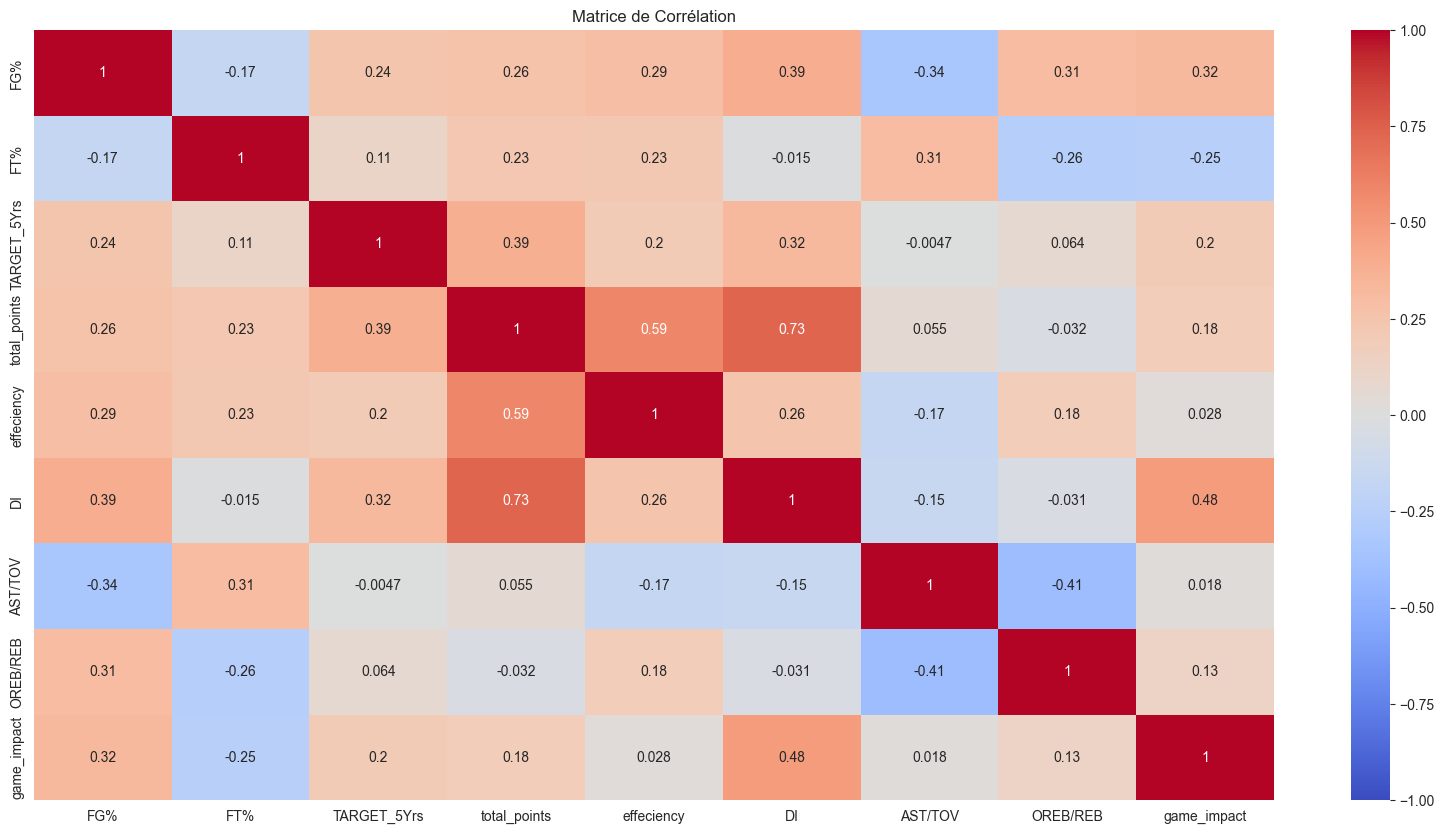

In [280]:
plot_corr(data_extracted)

**We observe that the features in the dataset, after data cleaning and transformation, are less correlated than those in the initial (raw) dataset. Additionally, the number of features was reduced from 19 features to 8 features.**


## Data Splitting and Scaling

In [281]:
Y=data_extracted['TARGET_5Yrs'] # Labels
data_extracted.drop(columns=['TARGET_5Yrs'],inplace=True)


In [282]:
# On divise la base de données en training data et test data
X_train, X_test, y_train, y_test = train_test_split(data_extracted, Y, test_size=0.2, random_state=42)


In [283]:
# scaling  de la base de donnée pour réduire la variance des features
scaler=MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Model Selection
### Random Forest

In [266]:
# cette fonction permet d'évaluer la performance du modèle financièrement en mesurant le gain ou la perte de l'investissement sur les joueurs du nba
def compute_gain(VP,FP,cout=100000,ROI_S=1.5,ROI_E=0.8):
    """
    :param VP: True Positifs
    :param FP: False Positifs
    :param cout: le cout d'investissment d'un seul joueur
    :param ROI_S: Return On investment en cas de succés
    :param ROI_E:  Returrn On investment en cas d'échec
    :return:  le gain ou la perte de l'investissement sur les joueurs du nba
    """
    net=ROI_S*VP*cout - ROI_E*FP*cout 
    if net>0 :
        print(f"L'investisseur gagne {net}")
    elif net<0 :
         print(f"L'investisseur perd {net}")
    else : 
         print(f"L'investisseur ni gangne ni perd.")



In [284]:

model=RandomForestClassifier()  # Random Forest Classifier
# l'espace de recherche des hyperparamètres
param_dist = {
    'n_estimators': [100, 200, 300, 400],  # Nombre d'arbres
    'max_depth': [2,5, 10, 20,],  # Profondeur maximale de chaque arbre
    'min_samples_split': [2,3,5, 10,20],  # Nombre minimum d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2, 4,10],  # Nombre minimum d'échantillons par feuille
}

grid_search_rf = GridSearchCV(estimator=model, 
                                   param_grid=param_dist, 
                                    scoring='recall',
                                   cv=5,  # Validation croisée à cv plis
                                   verbose=2,n_jobs=-1)
# On ajuste le modèle avec grid search en maximisant le recall
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


C:\Users\33665\Desktop\MPdata\flaskProject\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4, 10],
                         'min_samples_split': [2, 3, 5, 10, 20],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='recall', verbose=2)

In [303]:
# Feature Importance: pour random forest total_points est la feature la plus importante pour la prise de décision
feature_importances = grid_search_rf.best_estimator_.feature_importances_
for feature, importance in zip(data_extracted.columns, feature_importances):
    print(f"{feature}: {importance}")
    

FG%: 0.18189093740408546
FT%: 0.040680825015033555
total_points: 0.3541036287060799
effeciency: 0.10120985638293506
DI: 0.1967560136597973
AST/TOV: 0.012894003516310567
OREB/REB: 0.03731716708362837
game_impact: 0.07514756823212977


[[ 40  56]
 [ 20 137]]
Recall is 0.8726114649681529
preicison is 0.7098445595854922
F1 Score is 0.7828571428571428


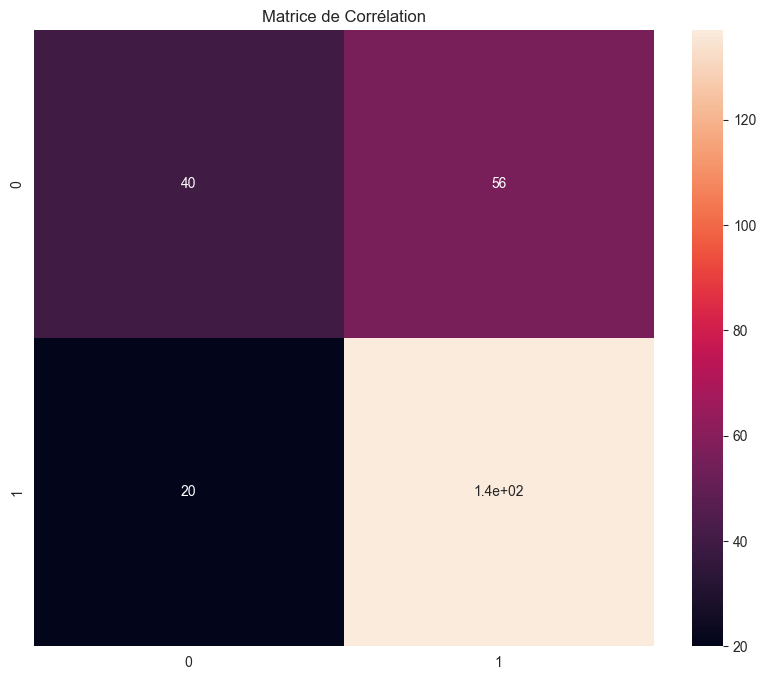

L'investisseur gagne 16070000.0


In [317]:
def plot_confusion_matrix(Y_pred,y_test):
    """
    
    :param Y_pred:  les prédictions du modele
    :param y_test: les labels réels
    :return: figure de  la matrice de confusion
    """
    plt.figure(figsize=(10,8))
    sns.heatmap(confusion_matrix(y_test,Y_pred), annot=True)
    plt.title('Matrice de Corrélation')
    plt.show()
    
Y_pred = grid_search_rf.predict(X_test) # les predicitons du random Forest
conf_matrix = confusion_matrix(y_test,Y_pred) # La matrice de confusion
print(conf_matrix)
print(f"Recall is {recall_score(y_test,Y_pred)}")
print(f"preicison is {precision_score(y_test,Y_pred)}")
print(f"F1 Score is {f1_score(y_test,Y_pred)}")
plot_confusion_matrix(Y_pred,y_test)
VP=conf_matrix[1][1] # Les vrais positifs
FP=conf_matrix[0][1] # Les faux positifs
compute_gain(VP,FP) # calcul du gain de l'investissemnt 


### SVM

Meilleurs hyperparamètres : {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Meilleur score d'entraînement : 1.00

Matrice de confusion :
[[  2  94]
 [  1 156]]
 recall is 0.9936305732484076
preicison is 0.624
 F1 score is 0.7665847665847666 


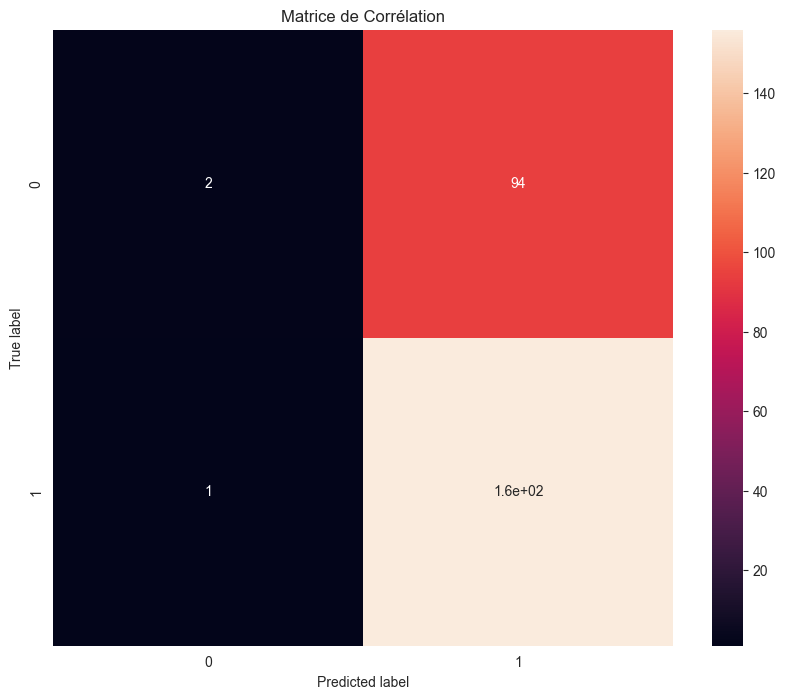

L'investisseur gagne 15880000.0


In [307]:

# le modèle SVM
svm = SVC()

# les paramètres à rechercher avec GridSearchCV


param_grid = {
    'C': [0.1, 1,2,5,10,80,100,120,130,200],          # Paramètre de régularisation
    'kernel': ['linear', 'rbf'],     # Types de noyaux à tester
    'gamma': [0.001, 0.01, 0.1, 1, 10],
}

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='recall'
                           , cv=5)

#  Ajusteement du modèle avec la validation croisée en maximisant le recall
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres et le meilleur score
print(f"Meilleurs hyperparamètres : {grid_search.best_params_}")
print(f"Meilleur score d'entraînement : {grid_search.best_score_:.2f}")

#  Évaluer le modèle sur l'ensemble de test
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)
conf_matrix = confusion_matrix(y_test,y_pred)
#  Afficher les résultats
print("\nMatrice de confusion :")
print(conf_matrix)
print(f" recall is {recall_score(y_test,y_pred)}")
print(f"preicison is {precision_score(y_test,y_pred)}")

print(f" F1 score is {f1_score(y_test,y_pred)} ")
plot_confusion_matrix(y_pred,y_test)
VP=conf_matrix[1][1]
FP=conf_matrix[0][1]
compute_gain(VP,FP)

### XGBoost

In [319]:
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  


In [320]:

# Définir les paramètres à tester avec GridSearchCV
param_grid = {
    'n_estimators': [5,10,50, 100, 200,300,400],
    'max_depth': [2,3,5],
    'learning_rate': [0.01, 0.1,0.001]
}

# Configurer GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='recall', cv=5)

# Ajuster GridSearchCV
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print(f"Meilleurs paramètres : {grid_search.best_params_}")



C:\Users\33665\Desktop\MPdata\flaskProject\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:26:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\33665\Desktop\MPdata\flaskProject\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:26:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\33665\Desktop\MPdata\flaskProject\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:26:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warn

Meilleurs paramètres : {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 5}


C:\Users\33665\Desktop\MPdata\flaskProject\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:27:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 recall is 1.0
preicison is 0.6205533596837944
 F1 score is 0.7828571428571428 


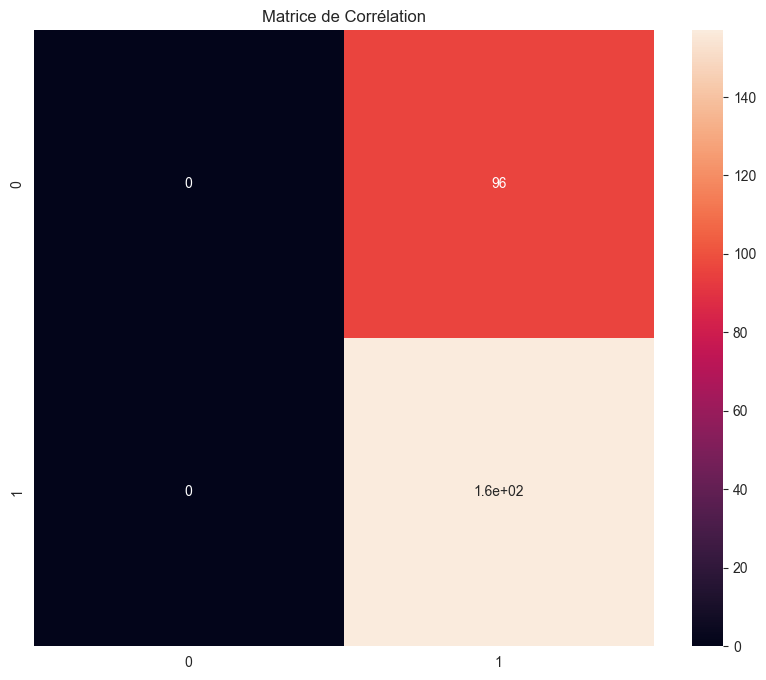

L'investisseur gagne 15870000.0


In [321]:
# Évaluation des performances du modele xgboost

best_xgb_clf = grid_search.best_estimator_
y_pred = best_xgb_clf.predict(X_test)
print(f" recall is {recall_score(y_test,y_pred)}")
print(f"preicison is {precision_score(y_test,y_pred)}")
print(f" F1 score is {f1_score(y_test,Y_pred)} ")
plot_confusion_matrix(y_pred,y_test)
conf_matrix=confusion_matrix(y_test,y_pred)
VP=conf_matrix[1][1]
FP=conf_matrix[0][1]
compute_gain(VP,FP)

## Model Analysis and Financial Implications


  | Modèle    | Random Forest | SVM   | XGboost
  |-----------|---------------|-------|----------
  | Recall    | 0.87          | 0.99  |1
  | Précision | 0.71          | 0.625 |0.620
  



We observe that the **XGBoost** and **SVM** models achieved the highest **recall**, with values of **1** and **0.99**, respectively. XGBoost misses no promising players with a career lasting more than 5 years, while SVM misses only 1 promising player. However, the confusion matrix of the **XGBoost** model, as well as that of **SVM**, shows that it is unable to identify players who will not play more than 5 years (**0 non-promising players** identified out of 96 for XGBoost, and **2 non-promising players** identified by SVM).

On the other hand, the **Random Forest** model produced a **recall** of **0.87**, lower than that of XGBoost and SVM. However, **Random Forest** is more accurate in identifying non-promising players (TN): **40 non-promising players** correctly identified out of 96 players.

### Financial Analysis

Now, let's analyze the financial results for each model:

- **Assumptions:**
  - The investment capital is open.
  - Each NBA player costs **100k euros**.
  - In case of a successful investment (**True Positive**), the **ROI** = **150%**.
  - In case of failure (**False Positive**), the **ROI** = **-80%**.

#### Net Investment Result for Each Model:

- **XGBoost**: 
  - **157 True Positives** (TP) and **96 False Positives** (FP).
  - The investor will invest **25,300k euros**.
  - The gain, according to the compute_gain function, will be **15,870k euros**.

- **SVM**:
  - The investor will gain **15,880k euros**, slightly more than XGBoost.

- **Random Forest**:
  - **137 True Positives** and **56 False Positives**.
  - The gain from this investment will be **16,070k euros**, higher than both SVM and XGBoost.


In [316]:
joblib.dump(grid_search_rf.best_estimator_, 'model_nba.pkl') # sauvegarder le modele  pour la partie deploiement
joblib.dump(scaler,'scaler.pkl') # sauvegarder le scaler

['scaler.pkl']